# Plotting feature importances

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer, load_boston

from rfpimp import *

## Rent data set, classify interest in ad

In [2]:
df_all = pd.read_csv("data/rent-cls.csv") 

num_features = ['bathrooms','bedrooms','latitude','longitude','price']
target = 'interest_level'

df = df_all[num_features + [target]]
df_train, df_test = train_test_split(df, test_size=0.15)

X_train, y_train = df_train.drop('interest_level',axis=1), df_train['interest_level']
X_test, y_test = df_test.drop('interest_level',axis=1), df_test['interest_level']

rf = RandomForestClassifier(n_estimators=100, n_jobs=-1,
#                            max_features=X_train.shape[1]-1,
                            max_features=1.0,
                            min_samples_leaf=10, oob_score=True)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1.0, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

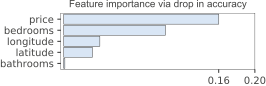

In [3]:
I = importances(rf, X_test, y_test)
plot_importances(I)

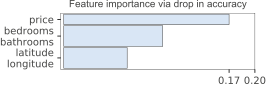

In [4]:
I = importances(rf, X_test, y_test, features=['price',['latitude','longitude']])
plot_importances(I)

## Breast cancer data set, classify malignant/benign

In [5]:
cancer = load_breast_cancer()

X, y = cancer.data, cancer.target
# show first 5 columns only
# df = pd.DataFrame(X[:, 0:10], columns=cancer.feature_names[0:10])
df = pd.DataFrame(X, columns=cancer.feature_names)
#df['diagnosis'] = cancer.target
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.15)

cl = RandomForestClassifier(n_estimators=100)
cl.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

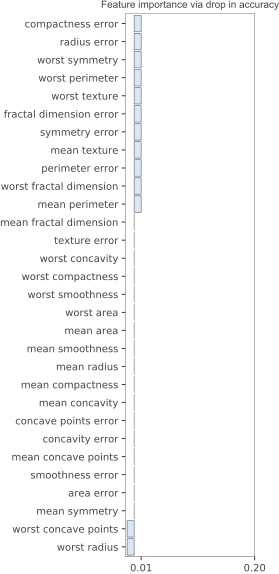

In [6]:
I = importances(cl, X_test, y_test)
plot_importances(I)

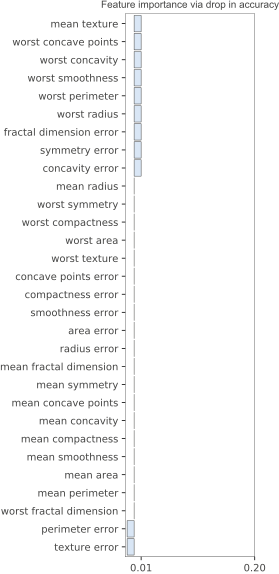

In [7]:
I = dropcol_importances(cl, X_train, y_train, X_test, y_test)
plot_importances(I)

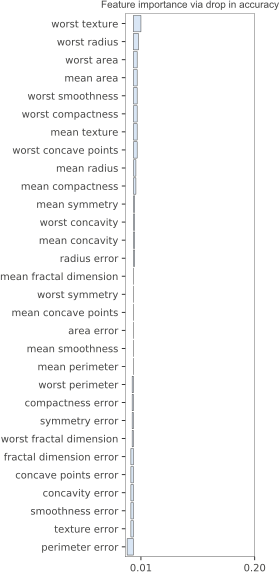

In [8]:
I = oob_dropcol_importances(cl, X_train, y_train)
plot_importances(I)

This obviously means that the features are highly collinear. Verified via:

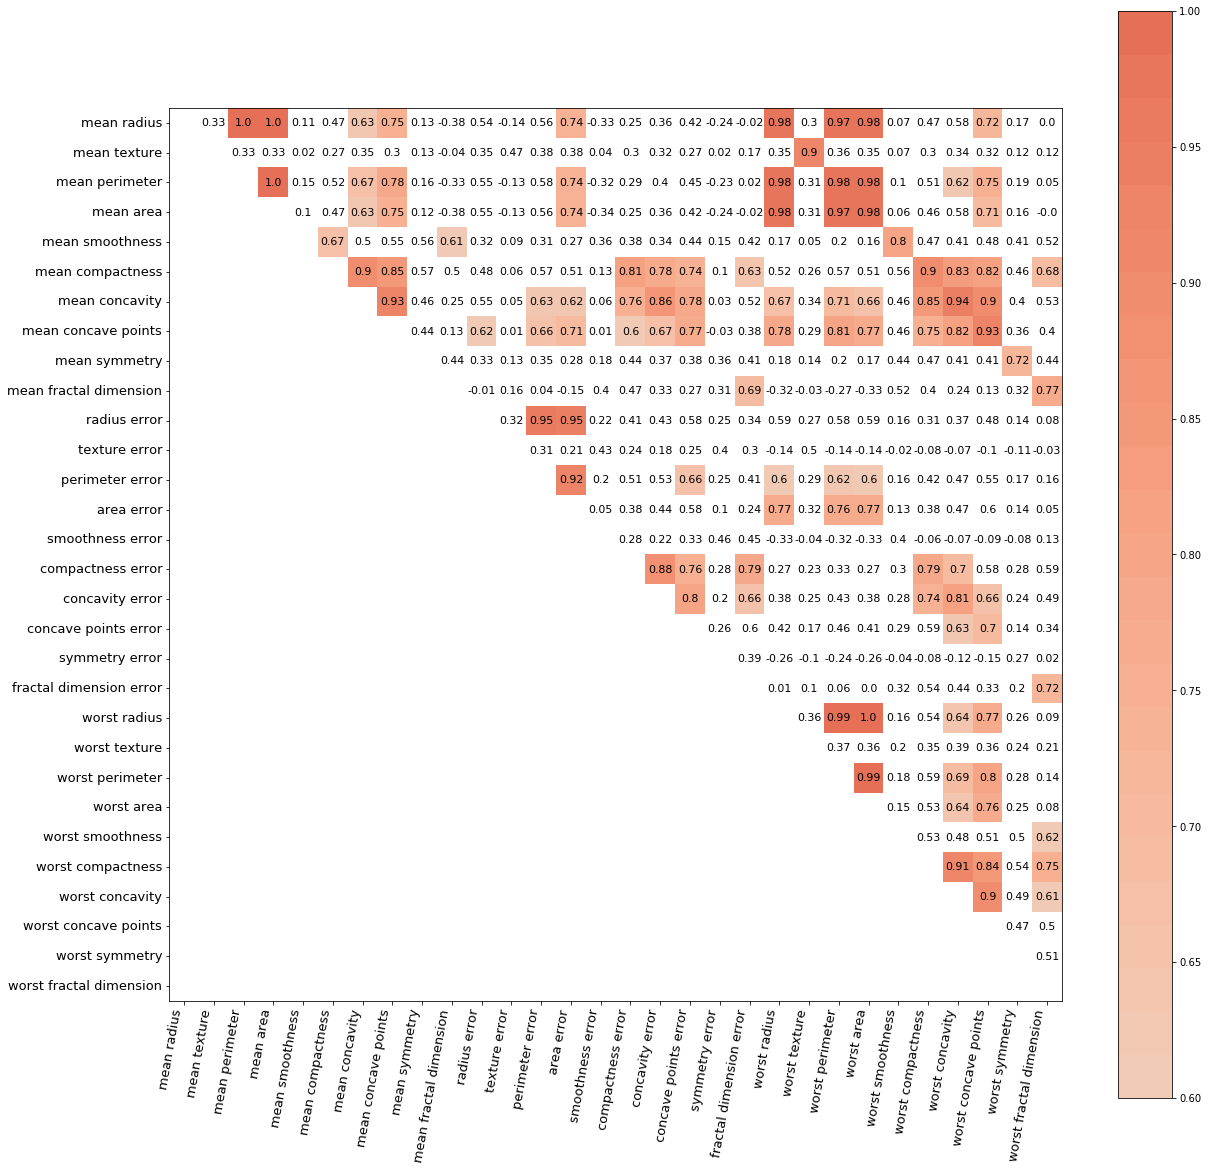

In [9]:
plot_corr_heatmap(X_train, figsize=(20,20), label_fontsize=13, value_fontsize=11)

Wow. And look at the predictability (R^2 or accuracy depending on column type) of the variables using other variables:

In [10]:
feature_dependence_matrix(X_train, n_samples=5000)

,Dependence,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,0.994772,1,-9.66653e-05,0.0716484,1.45857,1.68706e-05,3.02661e-05,0.000187423,5.24911e-05,2.33641e-05,...,0.000128513,-0.000182226,1.13739e-05,4.75228e-07,-0.000134803,-0.000142484,2.31116e-05,-0.000147679,-3.8146e-05,0.000122591
mean texture,0.845451,0.000177056,1,-5.66026e-05,-0.000967731,0.00230002,-0.00102827,-0.000638115,0.000481199,0.000489468,...,0.000886385,1.66202,-0.000382446,6.61087e-05,0.0166867,0.000184435,0.000727026,-0.00127259,0.0112483,0.00516855
mean perimeter,0.995172,1.02054,7.00338e-06,1,0.204745,4.39696e-05,4.01539e-05,0.000212802,0.000875936,-0.000187977,...,0.000206679,7.02778e-05,0.000354348,0.000331538,1.3711e-05,1.23713e-05,0.000113909,3.55593e-05,-1.42143e-05,0.000362352
mean area,0.986418,1.65025,-0.000101368,0.0178789,1,1.61631e-05,-1.29193e-05,0.000196161,-6.33997e-05,-5.34629e-05,...,0.000203648,8.14422e-05,4.47022e-05,-0.000229656,0.000291213,0.000304158,-1.92958e-05,-5.71081e-06,-0.000180432,-6.37914e-05
mean smoothness,0.761493,-0.000183439,0.00279255,-0.00047576,0.000545436,1,0.0538933,0.0048341,0.0184708,0.0384534,...,-0.000476165,0.00574915,5.02647e-05,-0.00137719,0.830476,0.00279555,0.00486044,0.00143898,0.00187304,0.00673893
mean compactness,0.914367,0.000907343,0.000319914,5.36916e-05,0.000313358,0.0403413,1,0.332388,0.0115547,0.0169861,...,0.000473308,0.00105336,0.000741398,-5.96487e-05,0.000824181,0.268375,-0.00157957,0.00259585,-0.000378967,0.00179294
mean concavity,0.937988,-0.00075098,0.000691816,0.00109319,0.000288438,0.00312616,0.0313411,1,0.34439,0.00157434,...,0.000363815,-3.21422e-05,0.00102243,-0.000283907,0.000279733,-0.0010529,0.215673,0.0102899,0.00140534,-0.000137994
mean concave points,0.941679,0.00240007,-0.000587282,0.0374262,0.00203696,0.00835367,0.00352865,0.243623,1,0.00119412,...,0.000920834,0.000588478,0.00815729,0.00327435,0.000210546,-0.000581188,0.00094507,0.546213,-0.00025558,0.000902693
mean symmetry,0.652536,-0.00142891,-0.00216065,-0.000279408,-0.00047443,0.0586038,0.0316149,0.00102902,-0.000668467,1,...,0.00182035,0.0040719,-0.00108806,-0.000398763,0.00642986,0.00122529,0.00288934,0.0027611,0.647396,0.0158254
mean fractal dimension,0.848939,0.0169414,0.000531696,0.00386767,0.0235724,0.112955,0.0121064,0.0024611,-0.000836698,0.0107478,...,0.00903878,0.000780465,0.00271981,0.0350108,0.00261557,-0.0022908,0.00139701,0.00470286,-0.0017333,0.580716
